In [9]:
import numpy as np
from scipy import signal
import math
import matplotlib.pyplot as plt
from PIL import Image

In [109]:
def FIR_LowPassFilter(img_square_length, cutoff_frequency):
    fs = img_square_length * 2
    nyq = fs / 2.0  # ナイキスト周波数

    # ナイキスト周波数が1になるように正規化
    # cutoff_frequencyの最大値は、img_square_length/2
    fe1 = cutoff_frequency / nyq
    
    # numtaps : フィルタの長さ
    b = signal.firwin(numtaps=img_square_length, cutoff=fe1)
    w, h = signal.freqz(b)
    
    # パワースペクトルに変換しています。
    powerSpectrum = 20 * np.log10(abs(h))
    # 位相応答を計算しています。
    PhaseResponse = np.unwrap(np.angle(h))
    f = w / (2 * np.pi) * fs
    
    #### パワースペクトルのグラフを表示します。
    
#     plt.figure(figsize=(7, 5))  # (width, height)
#     plt.xscale("log")
#     plt.plot(f, powerSpectrum)
#     plt.title('Digital filter frequency response')
#     plt.xlabel('Frequency [Hz]')
#     plt.ylabel('Amplitude [dB]')
#     plt.margins(0, 0.1)
#     plt.xlim(0, nyq)
#     # 灰色のx軸、y軸に並行な線を引きます。
#     plt.grid(which='both', axis='both')
#     # カットオフ周波数に垂線を引きます。
#     plt.axvline(cutoff_frequency, color='green') 
#     plt.show()

    #################
    
    #### 位相応答をグラフで表示します。
    
#     plt.plot(f, PhaseResponse)
#     plt.title('Digital filter phase response')
#     plt.xlabel('Frequency [Hz]')
#     plt.ylabel('Phase')
#     # 余白が表示されなくなります。
#     plt.margins(0, 0.1)
#     plt.xlim(0, nyq)
#     plt.grid(which='both', axis='both')
#     # カットオフ周波数に垂線を引きます。
#     plt.axvline(cutoff_frequency, color='green') 
#     plt.show()
    
    #################
    
    #### 群遅延を表示します。

    
    #################
    
    # originは原点の意味です。正方形のimageを扱っています。
    origin_x = img_square_length/2
    origin_y = img_square_length/2
    
    # 画像の原点からの距離を計算して、DistanceFromOriginに2次元リストとして保存します。
    DistanceFromOrigin = []
    
    # 原点からの距離を1次元リストとして保存しています。
    for x in range(img_square_length):
        for y in range(img_square_length):
            DistanceFromOrigin.append(math.sqrt((x - origin_x)**2+(y - origin_y)**2))
    
    # reshapeするためにarray型に変更しました。
    DistanceFromOrigin = np.array(DistanceFromOrigin)
    # 1次元リストを2次元に変更しました。
    DistanceFromOrigin = DistanceFromOrigin.reshape(img_square_length, -1)

    DistanceFromOrigin = DistanceFromOrigin * (2 * np.pi) / fs
    
    # bはsignal.firwinの戻り値です。
    w_2D, h_2D = signal.freqz(b, worN=DistanceFromOrigin)
    
    #### ２次元のパワースペクトルを表示します。
#     # 2次元のパワースペクトルを計算しています。
#     powerSpectrum_2D = 20 * np.log10(abs(h_2D))
#     plt.imshow(powerSpectrum_2D, cmap='gray')
#     plt.colorbar()
#     # メモリを非表示にしています。
#     plt.axis('off')
#     plt.show()
    
    #################
    
    #### 伝達関数の分母を表示しています。分子は1です。
    
#     H = """\
#                      jw                      -jw                 -jwM
#          jw    B(e  )    b[0] + b[1]e    + ... + b[M]e
#     H(e  ) = ------ = -----------------------------------
#                      jw                     -jw                 -jwN
#                 A(e  )    a[0] + a[1]e    + ... + a[N]e
#     """
#     A = [1]
#     print("伝達関数：")
#     print(H)
#     print()
    
#     print("分子のA：")
#     print(A)
#     print()
    
#     print("分母のB：")
#     print(b)

    #################
    
    return h_2D

In [111]:
# imageをロードしてから、fftしてシフトさせるまでの自作関数です。
def imgLoad_shiftedFuv(original_img_file):
    original_img = Image.open(original_img_file)
    original_gray_img = original_img.convert('L')
    original_f_xy = np.asarray(original_gray_img)
    original_f_uv = np.fft.fft2(original_f_xy)
    original_shifted_f_uv = np.fft.fftshift(original_f_uv)
    return original_shifted_f_uv

# FIRLowPassフィルターを適用して、適用した結果の画像を返します。
# imgLoad_shiftedFuvとセットで使うことを想定しています。
def imgLoad_FIRLowPassFiltered_shiftedFuv(original_shifted_f_uv, cutoff_frequency):
    h_2D = FIR_LowPassFilter(original_shifted_f_uv.shape[0], cutoff_frequency)
    
    # フィルタを適用しています。
    FIR_LowPassFiltered_f_uv = np.multiply(original_shifted_f_uv, h_2D)
    FIR_LowPassFiltered_unshifted_f_uv = np.fft.fftshift(FIR_LowPassFiltered_f_uv)
    FIR_LowPassFiltered_i_f_xy = np.fft.ifft2(FIR_LowPassFiltered_unshifted_f_uv).real
    
    return FIR_LowPassFiltered_i_f_xy

画像の中に 2 個の波が含まれる時にFIRローパスフィルタを適用しました。


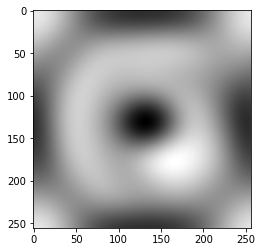

画像の中に 3 個の波が含まれる時にFIRローパスフィルタを適用しました。


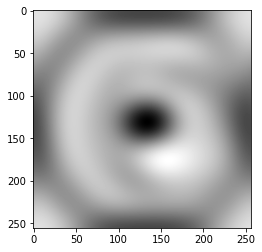

画像の中に 4 個の波が含まれる時にFIRローパスフィルタを適用しました。


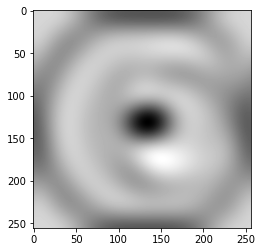

画像の中に 5 個の波が含まれる時にFIRローパスフィルタを適用しました。


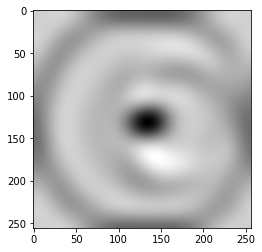

In [112]:
for i in range(2,6):
    print("画像の中に",i,"個の波が含まれる時にFIRローパスフィルタを適用しました。")
    shifted_f_uv = imgLoad_shiftedFuv('../Images/G256.png')
    FIR_LowPassFiltered_i_f_xy = imgLoad_FIRLowPassFiltered_shiftedFuv(shifted_f_uv, i)
    plt.imshow(FIR_LowPassFiltered_i_f_xy, cmap='gray')
    plt.show()

In [106]:
def Bessel_LowPassFilter(img_square_length, cutoff_frequency):
    from scipy import signal
    # signal.bessel(次元、カットオフ周波数)
    b_bessel, a_bessel = signal.bessel(4, cutoff_frequency, 'low', analog=True)
    
    w_bessel, h_bessel = signal.freqs(b_bessel, a_bessel)
    
    # パワースペクトルに変換しています。
    powerSpectrum_bessel = 20 * np.log10(abs(h_bessel))
    
    # 位相応答を計算しています。
    PhaseResponse = np.unwrap(np.angle(h_bessel))
    
    # 群遅延を計算しています。
    GroupDelay =-np.diff(np.unwrap(np.angle(h_bessel)))/np.diff(w_bessel)
    
    #### パワースペクトルのグラフを表示します。
    
#     plt.figure(figsize=(7, 5))  # (width, height)
#     plt.xscale("log")
#     plt.plot(w_bessel, powerSpectrum_bessel)
#     plt.title('Bessel filter frequency response')
#     plt.xlabel('Frequency [Hz]')
#     plt.ylabel('Amplitude [dB]')
#     # 余白が表示されなくなります。
#     plt.margins(0, 0.1)
#     # 灰色のx軸、y軸に並行な線を引きます。
#     plt.grid(which='both', axis='both')
#     # カットオフ周波数に垂線を引きます。
#     plt.axvline(cutoff_frequency, color='green') 
#     plt.show()

    #################
    
    #### 位相応答をグラフで表示します。
    
#     plt.plot(w_bessel, PhaseResponse)
#     plt.title('Bessel filter phase response')
#     plt.xlabel('Frequency [Hz]')
#     plt.ylabel('Phase')
#     # 余白が表示されなくなります。
#     plt.margins(0, 0.1)
#     # 灰色のx軸、y軸に並行な線を引きます。
#     plt.grid(which='both', axis='both')
#     # カットオフ周波数に垂線を引きます。
#     plt.axvline(cutoff_frequency, color='green') 
#     plt.show()

    #################
    
    #### 群遅延を表示します。
    
#     plt.plot(w_bessel[1:], GroupDelay)
#     plt.xscale('log')
#     plt.title('Bessel filter group delay')
#     plt.xlabel('Frequency [Hz]')
#     plt.ylabel('Group delay')
#     # 余白が表示されなくなります。
#     plt.margins(0, 0.1)
#     # 灰色のx軸、y軸に並行な線を引きます。
#     plt.grid(which='both', axis='both')
#     # カットオフ周波数に垂線を引きます。
#     plt.axvline(cutoff_frequency, color='green')
#     plt.show()
    
    #################
    
    # originは原点の意味です。正方形のimageを扱っています。
    origin_x = img_square_length/2
    origin_y = img_square_length/2
    
    # 画像の原点からの距離を計算して、DistanceFromOriginに2次元リストとして保存します。
    DistanceFromOrigin = []
    
    # 原点からの距離を1次元リストとして保存しています。
    for x in range(img_square_length):
        for y in range(img_square_length):
            DistanceFromOrigin.append(math.sqrt((x - origin_x)**2+(y - origin_y)**2))
    
    # reshapeするためにarray型に変更しました。
    DistanceFromOrigin = np.array(DistanceFromOrigin)
    # 1次元リストを2次元に変更しました。
    DistanceFromOrigin = DistanceFromOrigin.reshape(img_square_length, -1)
    
    w_2D, h_2D = signal.freqs(b_bessel, a_bessel, worN=DistanceFromOrigin)
    
    #### ２次元のパワースペクトルを表示します。
    
#     # 2次元のパワースペクトルを計算しています。
#     powerSpectrum_2D = 20 * np.log10(abs(h_2D))
#     plt.imshow(powerSpectrum_2D, cmap='gray')
#     plt.colorbar()
#     # メモリを非表示にしています。
#     plt.axis('off')
#     plt.show()
    
    #################
    
    #### 伝達関数の分母を表示しています。分子は1です。
    
#     H = """\
#                  b[0]*(jw)**M + b[1]*(jw)**(M-1) + ... + b[M]
#     H(w) =  ----------------------------------------------------------
#                  a[0]*(jw)**N + a[1]*(jw)**(N-1) + ... + a[N]
#     """

#     print("伝達関数：")
#     print(H)
#     print()
    
#     print("分母のA：")
#     print(a_bessel)
#     print()
    
#     print("分子のB：")
#     print(b_bessel)

    #################
    
    return h_2D

In [107]:
# BesselLowPassフィルターを適用して、適用した結果の画像を返します。
# imgLoad_shiftedFuvとセットで使うことを想定しています。
def imgLoad_BesselLowPassFiltered_shiftedFuv(original_shifted_f_uv, cutoff_frequency):
    h_2D = Bessel_LowPassFilter(original_shifted_f_uv.shape[0], cutoff_frequency)
    
    # フィルタを適用しています。
    Bessel_LowPassFiltered_f_uv = np.multiply(original_shifted_f_uv, h_2D)
    Bessel_LowPassFiltered_unshifted_f_uv = np.fft.fftshift(Bessel_LowPassFiltered_f_uv)
    Bessel_LowPassFiltered_i_f_xy = np.fft.ifft2(Bessel_LowPassFiltered_unshifted_f_uv).real
    
    return Bessel_LowPassFiltered_i_f_xy

画像の中に 2 個の波が含まれる時にベッセルローパスフィルタを適用しました。


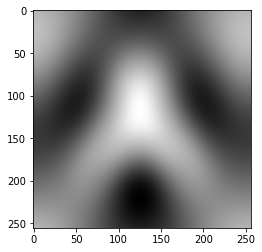

画像の中に 3 個の波が含まれる時にベッセルローパスフィルタを適用しました。


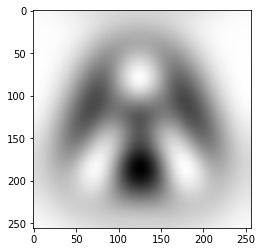

画像の中に 4 個の波が含まれる時にベッセルローパスフィルタを適用しました。


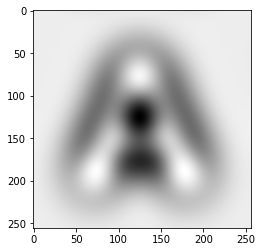

画像の中に 5 個の波が含まれる時にベッセルローパスフィルタを適用しました。


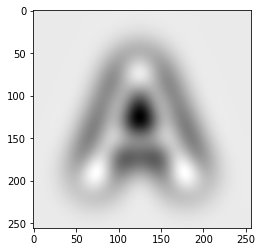

In [108]:
for i in range(2,6):
    print("画像の中に",i,"個の波が含まれる時にベッセルローパスフィルタを適用しました。")
    shifted_f_uv = imgLoad_shiftedFuv('../Images/A256.png')
    Bessel_LowPassFiltered_i_f_xy = imgLoad_BesselLowPassFiltered_shiftedFuv(shifted_f_uv, i)
    plt.imshow(Bessel_LowPassFiltered_i_f_xy, cmap='gray')
    plt.show()

In [2]:
import os
from PIL import Image, ImageDraw, ImageFont

In [6]:
original_images_path = '/Users/okadamasayuki/Desktop/experiment_cpd_0-1/experiment_cpd01/original_images'
try:
    os.makedirs(original_images_path)
except FileExistsError:
    print('フォルダーが既に存在したためスルーしました')

フォルダーが既に存在したためスルーしました


In [7]:
# 画像に文字を重ねる
def put_char_onWhite(square, char, save_path):
    """
        char：重ねる文字
    """
    pix = [0, 0, 0, 255]   # ４つだとRGBA Aはアルファで透明度を意味する
    black_image_matrix = [ [ pix ] * square ] * square
    black_image_array = np.asarray(black_image_matrix)
    black_image_array = black_image_array.astype(np.uint8)
    black_image_pil = Image.fromarray(black_image_array)
#     plt.imshow(black_image_array)
#     plt.show()
    
    draw = ImageDraw.Draw(black_image_pil)  # ImageDrawオブジェクトを作成

    font = ImageFont.truetype("Arial", square)  # フォントを指定、64はサイズでピクセル単位
    size = font.getsize(char)

    draw.text((square/2 - size[0]/2, square/2 - size[1]/2 - square/10), char, font=font, fill='white')
    
#     plt.imshow(black_image_pil)
#     plt.show()
    black_image_pil.save(save_path+"/"+char+str(square)+"x"+str(square)+".png", 'PNG', quality=100, optimize=True)

In [10]:
alp =["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q","R","S","T","U","V","W","X","Y","Z"]
square = 480
for i in range(len(alp)):
    put_char_onWhite(square, alp[i], original_images_path)

In [97]:
# フィルタを適用した画像を保存するフォルダーを、processingの実験プログラムのフィルダ内に作成してます。
Passed_save_path = '/Passed_'+str(square)+"x"+str(square)
try:
    os.makedirs(Passed_save_path)
except FileExistsError:
    print('フォルダーが既に存在したためスルーしました')

In [98]:
min_cycle = 2
max_cycle = 5

In [ ]:
for alphabet_index in range(len(alp)):
    # フィルタを適用する前の元画像を指定してます。
    original_image = original_images_path+"/"+alp[alphabet_index]+str(square)+"x"+str(square)+".png"
    
    # 画像を二次元フーリエ変換をします。
    shifted_f_uv = imgLoad_shiftedFuv(original_image)
    
    # max_cycleを含んでます。
    for cycle in range(min_cycle, max_cycle+1):
        # FIRローパスフィルタの保存先pathです。
        FIR_file_path               = Passed_save_path + "/"+alp[alphabet_index]+"_"+str(cycle)+"cycle_FIRfilter.png"
        # ベッセルローパスフィルタの保存先pathです。
        bessel_file_path          = Passed_save_path + "/"+alp[alphabet_index]+"_"+str(cycle)+"cycle_Besselfilter.png"
        
        # cycle（画像に何個しましまが含まれるか）と、二次元フーリエ変換の半径を対応させてます。
        radius = cycle_to_radius(cycle)
        
        FIR_LowPassFiltered_i_f_xy = imgLoad_FIRLowPassFiltered_shiftedFuv(shifted_f_uv, radius)
        Bessel_LowPassFiltered_i_f_xy = imgLoad_BesselLowPassFiltered_shiftedFuv(shifted_f_uv, radius)
        
        # 画像を保存しました。
        plt.imsave(FIR_file_path, FIR_LowPassFiltered_i_f_xy)
        plt.imsave(bessel_file_path, Bessel_LowPassFiltered_i_f_xy)

In [99]:
def cycle_to_radius(cycle):
    radius = cycle
    return radius